In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

## Exploratory Data Analysis

In [3]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.shape

(768, 9)

In [14]:
pd.unique(df['Pregnancies'])

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
import seaborn as sns

In [121]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

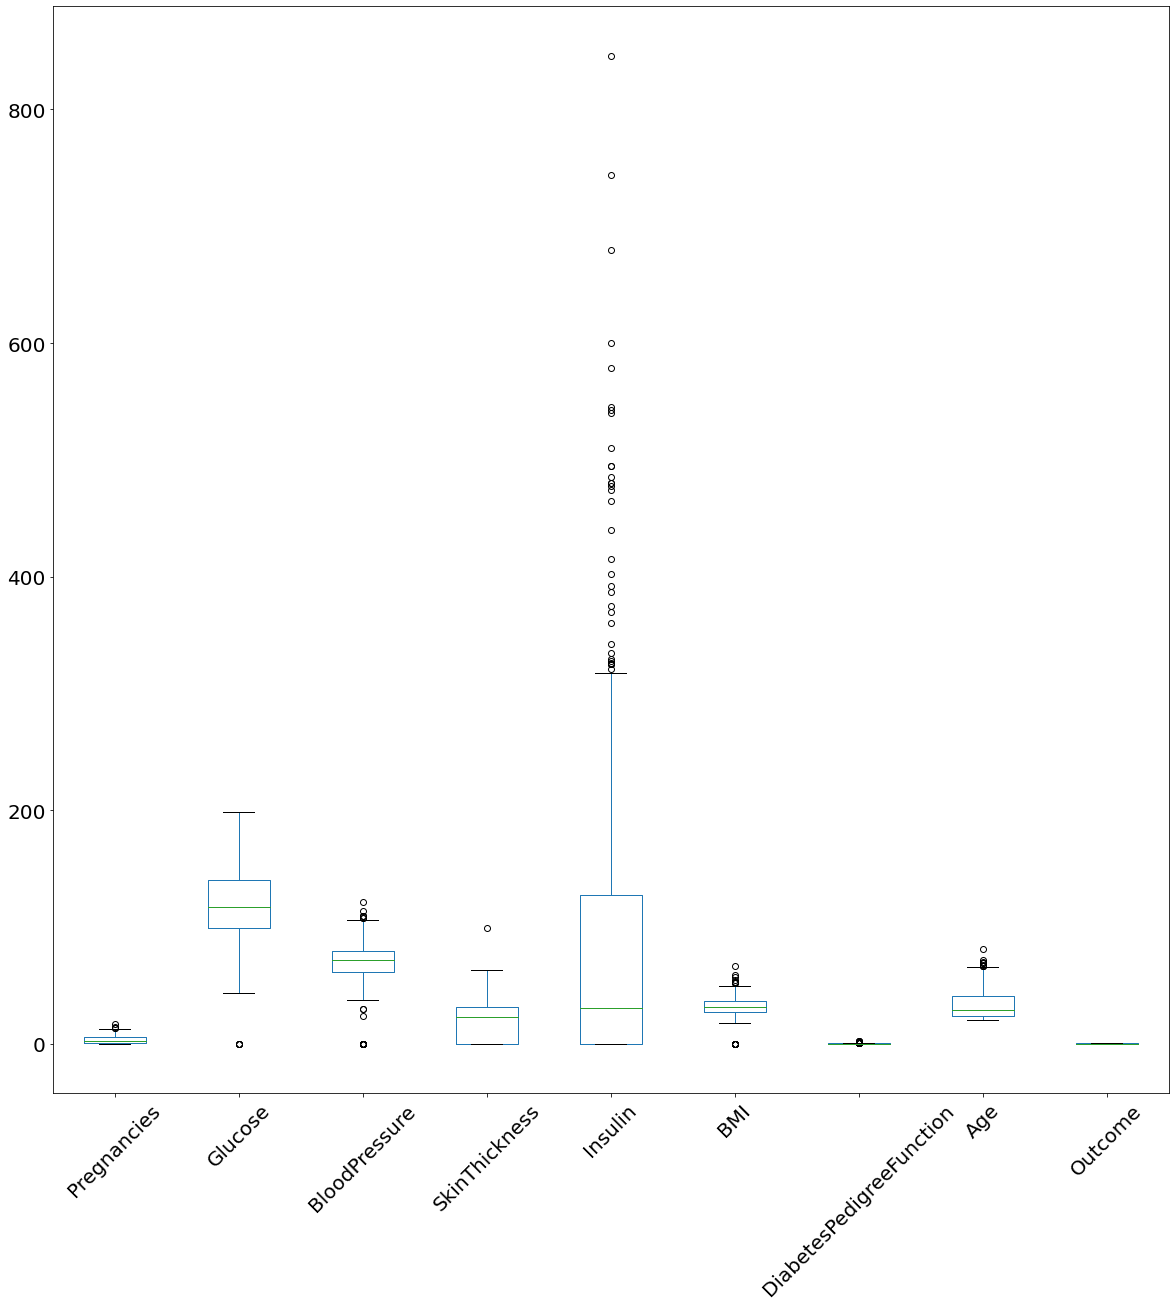

In [122]:
df.boxplot(grid=False, rot=45, fontsize=20, figsize=(20, 20))

## Discovers outliers with mathematical fucntion using Z-Score

In [123]:
# Z-Score is the signed number of standard deviations by which the value of an oberservation or data point is above the mean value of what is being observed or measured. Z - Score is finding the distribution of data where mean is 0 and Standard deviation 1. For example Normal Distribution.

In [124]:
from scipy import stats
import numpy as np

In [125]:
z = np.abs(stats.zscore(df))

In [126]:
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [127]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [128]:
threshold = 3
np.where(z > 3)

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
         78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
        193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
        332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
        426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
        494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
        619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
        706, 753]),
 array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
        2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
        2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
        5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
        2, 2, 2, 5, 4]))

In [129]:
z[4][6]

5.484909100466951

## IQR Score -

In [130]:
# Box plot use the IQR method. IQR = Q3-Q1

In [131]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [132]:
IQR = Q3-Q1

In [133]:
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [134]:
(df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5 * IQR))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [135]:
## Now we know outliers in our dataset

## Working with Outliers: Correcting, Removing

## Method 1: Remove outliers using Z-Score which we have already calculated

In [136]:
df_with_zscore = df[(z < 3).all(axis=1)]

In [137]:
print("Old dataframe shape is : {0}".format(df.shape))
print("After removed outliers new shape is : {0}".format(df_with_zscore.shape))

Old dataframe shape is : (768, 9)
After removed outliers new shape is : (688, 9)


In [138]:
# So above code removed 80 rows 

## Method 2: Remove outliers using IQR which we have already calculated.

In [139]:
df_with_iqr = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [140]:
df_with_iqr.shape

(639, 9)

<AxesSubplot:>

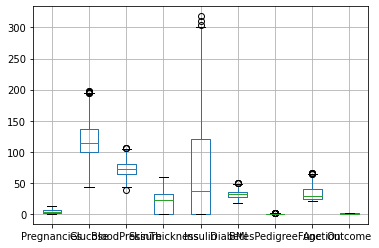

In [141]:
df_with_iqr.boxplot()

In [142]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Feature Selection

In [143]:
# Feature selection is the process where you automatically or manually select those feature which contribute most to your prediction variable or output in which you are interested.

# Having irrelevent features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. 

In [144]:
# How to select features and what are Benefits of performing feature selection before modelling your data?

In [145]:
# Reduces Overfitting: Less redundant data means less opportunuity to make decisions based on noise.
# Improves Accuracy: Less misleading data means modelling accuracy improves.
# Reduces Training Time: Fewer data points reduce algorithm complexity and algorithms train faster. 

In [146]:
# Get Independent and Target Column
X_z = df_with_iqr.iloc[:,:-1]
y_z = df_with_iqr.iloc[:,-1]
X_iqr = df_with_iqr.iloc[:,:-1]
y_iqr = df_with_iqr.iloc[:,-1]

In [147]:
# Get correlations of each features in dataset.

In [148]:
import matplotlib.pyplot as plt

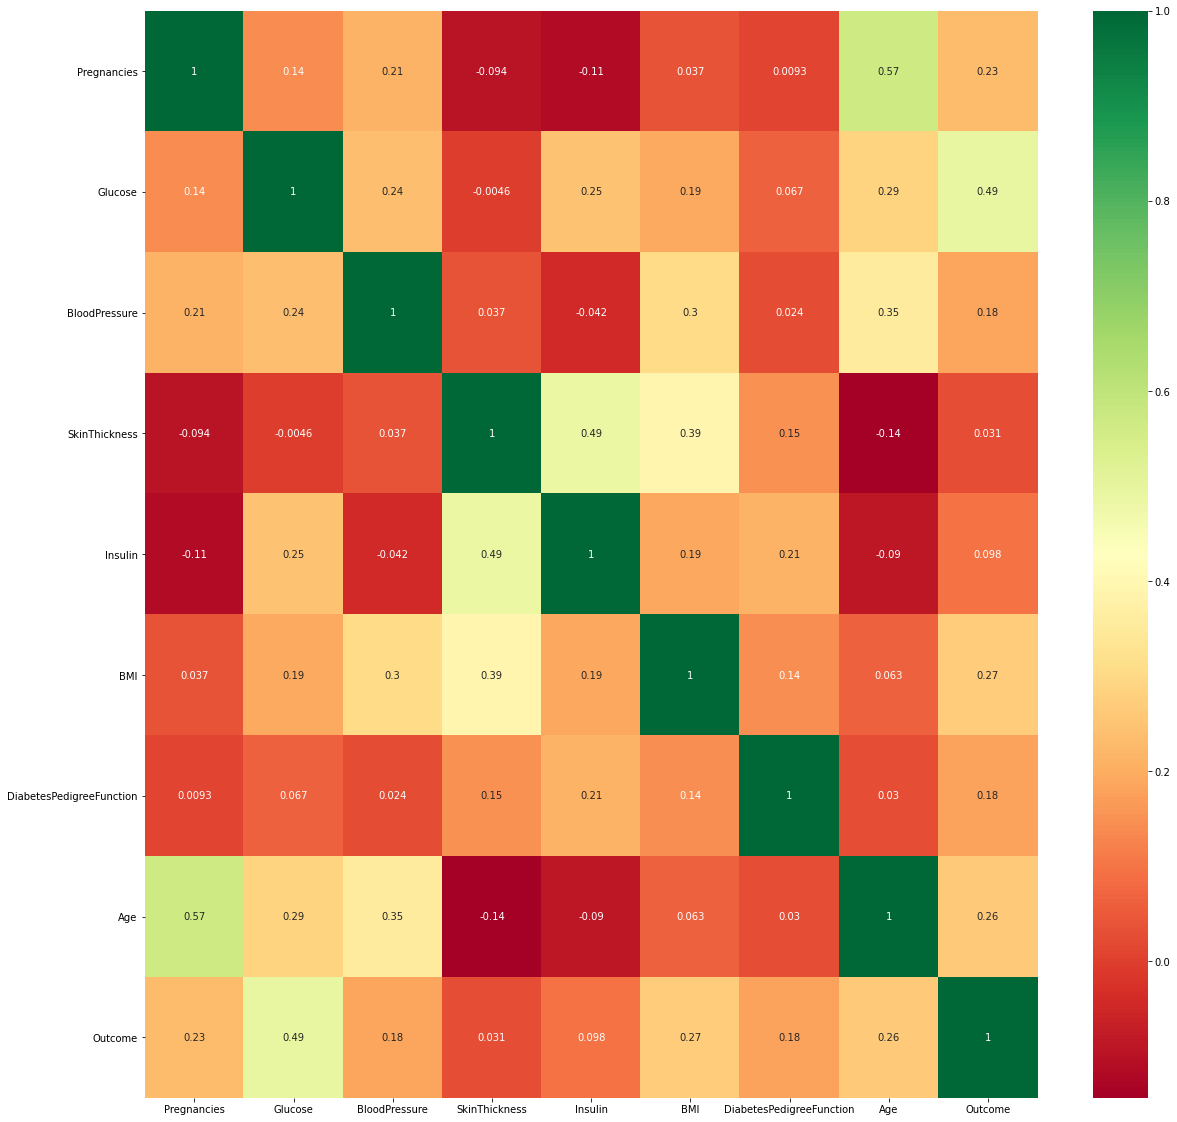

In [149]:
corrmat = df_with_iqr.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20, 20))
# Plot heatmap
g = sns.heatmap(df_with_iqr[top_corr_feature].corr(), annot=True, cmap="RdYlGn")

In [150]:
df_with_iqr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_z_train, X_z_test, y_z_train, y_z_test = train_test_split(X_z, y_z, test_size=0.25, random_state=0)
X_iqr_train, X_iqr_test, y_iqr_train, y_iqr_test = train_test_split(X_iqr, y_iqr, test_size=0.25, random_state=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
557,8,110,76,0,0,27.8,0.237,58
591,2,112,78,50,140,39.4,0.175,24
629,4,94,65,22,0,24.7,0.148,21
738,2,99,60,17,160,36.6,0.453,21
107,4,144,58,28,140,29.5,0.287,37
...,...,...,...,...,...,...,...,...
539,3,129,92,49,155,36.4,0.968,32
517,7,125,86,0,0,37.6,0.304,51
555,7,124,70,33,215,25.5,0.161,37
492,4,99,68,38,0,32.8,0.145,33


## Compare Multiple Model 

In [154]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Model Traning with Z-Score Data

In [165]:
lr_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
lda_classifier = LinearDiscriminantAnalysis()
gnb_classifier = GaussianNB()
y_z_train

582    0
474    0
306    1
297    0
488    0
      ..
16     1
438    0
234    0
758    0
678    1
Name: Outcome, Length: 479, dtype: int64

In [166]:
lr_classifier.fit(X_iqr_train, y_iqr_train)
# dt_classifier.fit(X_z_train, y_z_train)
# knn_classifier.fit(X_z_train, y_z_train)
# lda_classifier.fit(X_z_train, y_z_train)
# gnb_classifier.fit(X_z_train, y_z_train)

AttributeError: 'str' object has no attribute 'decode'